# Course Project

***

## Project Description

The data set has 191,096 rows and 18 columns. First calculate a rough estimate of how much memory the dataset will require in memory before reading into R. Make sure your computer has enough memory (most modern computer should be fine). 

## Import Libraries

In [62]:
import numpy as np
from numpy import count_nonzero
from numpy import median
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
#pd.set_option('max_colwidth', 5000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dennis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Autosaving every 60 seconds


## Exploratory Data Analysis

In [63]:
df = pd.read_csv("data_complaints.csv",parse_dates=['Date received','Date sent to company'])

In [64]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2018-04-19,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",AL,361XX,None,Consent not provided,Web,2018-04-19,Closed with explanation,Yes,NaN,2880655
1,2019-02-12,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute about a purchase on your statement,I initially in writing to Chase Bank in late XXXX about a charge that was unauthorized on XXXX from XXXX in the amount of {$790.00} after many letters and complaints they still did not do anything yet in XXXX they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in XXXX XXXX XXXX XXXX against them,None,JPMORGAN CHASE & CO.,CT,064XX,None,Consent provided,Web,2019-02-12,Closed with monetary relief,Yes,NaN,3149693
2,2018-04-12,Mortgage,Conventional home mortgage,Incorrect information on your report,None,"My ex husband and myself had a mobile home ( Home Mortgage ) with XXXX XXXX back in XX/XX/XXXX. I went through a horrible divorce as my husband was using drugs and failing to pay the bills which led to my having to divorce him. The Mortgage was in both of our names. We only had the Mortgage for one year and they got the trailer bc of being unable to pay debt. I was not working at the time as I had just given birth to my first child in XX/XX/XXXX ( she is now XXXX of age ) as this happened years ago. \n\nNow after 21 years, XXXX XXXX XXXX XXXX filled a XXXX XXXX to the IRS and the IRS alerted me which caused me an adverse affect on my IRS taxes. \nI received a l letter from the IRS XX/XX/XXXX which stated that due to DITECH Mortgage sending a XXXX with taxable income of {$17000.00}, this could cause me to have to owe the IRS {$2900.00}. IRS Told me to contact DITECH Financial to dispute this and request that DITECH Mortgage rescind the XXXX in order ( so it is not XXXX, XXXX taxabl...",Company believes complaint is the result of an isolated error,Ditech Financial LLC,GA,None,None,Consent provided,Web,2018-04-12,Closed with explanation,Yes,NaN,2873888
3,2018-04-18,Student loan,Federal student loan servicing,Struggling to repay your loan,Problem lowering your monthly payments,"I was a student at XXXX XXXX from XX/XX/XXXX-XX/XX/XXXX. I accumulated XXXX of debt in student loans. This school flat out lied to me. I was under the assumption it would have been less than half of that since I had a lot of credits that transferred, not to mention this school promised me job placement, which they did not! They told me I would be making a lot more than what I do. They gave me false information. The only thing this school did for me is put me in tons of debt and lied to me. I am a single mother of XXXX and was so excited to get my degree. Until I graduated and realize how much they lied to me. The school is now shut down. Can I get these loans forgiven due to being lied to and given false information that basically pressured me into enrolling. If I would have known that my student loans would have been this high. I would have just st

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191096 entries, 0 to 191095
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 191096 non-null  datetime64[ns]
 1   Product                       191096 non-null  object        
 2   Sub-product                   191096 non-null  object        
 3   Issue                         191096 non-null  object        
 4   Sub-issue                     191096 non-null  object        
 5   Consumer complaint narrative  90975 non-null   object        
 6   Company public response       191096 non-null  object        
 7   Company                       191096 non-null  object        
 8   State                         191096 non-null  object        
 9   ZIP code                      191096 non-null  object        
 10  Tags                          191096 non-null  object        
 11  Consumer cons

In [66]:
df.describe()

,Consumer disputed?,Complaint ID
count,0.00,191096.00
mean,NaN,3242692.66
std,NaN,332786.79
min,NaN,2702098.00
25%,NaN,2954293.75
50%,NaN,3219961.50
75%,NaN,3517407.25
max,NaN,3900135.00


In [67]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID'], dtype='object')

In [68]:
df2 = df[df["Date received"] > '2018-01-01']
df2.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2018-04-19,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",AL,361XX,None,Consent not provided,Web,2018-04-19,Closed with explanation,Yes,NaN,2880655
1,2019-02-12,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute about a purchase on your statement,I initially in writing to Chase Bank in late XXXX about a charge that was unauthorized on XXXX from XXXX in the amount of {$790.00} after many letters and complaints they still did not do anything yet in XXXX they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in XXXX XXXX XXXX XXXX against them,None,JPMORGAN CHASE & CO.,CT,064XX,None,Consent provided,Web,2019-02-12,Closed with monetary relief,Yes,NaN,3149693
2,2018-04-12,Mortgage,Conventional home mortgage,Incorrect information on your report,None,"My ex husband and myself had a mobile home ( Home Mortgage ) with XXXX XXXX back in XX/XX/XXXX. I went through a horrible divorce as my husband was using drugs and failing to pay the bills which led to my having to divorce him. The Mortgage was in both of our names. We only had the Mortgage for one year and they got the trailer bc of being unable to pay debt. I was not working at the time as I had just given birth to my first child in XX/XX/XXXX ( she is now XXXX of age ) as this happened years ago. \n\nNow after 21 years, XXXX XXXX XXXX XXXX filled a XXXX XXXX to the IRS and the IRS alerted me which caused me an adverse affect on my IRS taxes. \nI received a l letter from the IRS XX/XX/XXXX which stated that due to DITECH Mortgage sending a XXXX with taxable income of {$17000.00}, this could cause me to have to owe the IRS {$2900.00}. IRS Told me to contact DITECH Financial to dispute this and request that DITECH Mortgage rescind the XXXX in order ( so it is not XXXX, XXXX taxabl...",Company believes complaint is the result of an isolated error,Ditech Financial LLC,GA,None,None,Consent provided,Web,2018-04-12,Closed with explanation,Yes,NaN,2873888
3,2018-04-18,Student loan,Federal student loan servicing,Struggling to repay your loan,Problem lowering your monthly payments,"I was a student at XXXX XXXX from XX/XX/XXXX-XX/XX/XXXX. I accumulated XXXX of debt in student loans. This school flat out lied to me. I was under the assumption it would have been less than half of that since I had a lot of credits that transferred, not to mention this school promised me job placement, which they did not! They told me I would be making a lot more than what I do. They gave me false information. The only thing this school did for me is put me in tons of debt and lied to me. I am a single mother of XXXX and was so excited to get my degree. Until I graduated and realize how much they lied to me. The school is now shut down. Can I get these loans forgiven due to being lied to and given false information that basically pressured me into enrolling. If I would have known that my student loans would have been this high. I would have just st

In [69]:
df2.Product.value_counts()

Credit card or prepaid card    75846
Mortgage                       65852
Student loan                   19529
Vehicle loan or lease          16557
Name: Product, dtype: int64

In [70]:
df3 = df2[df2["Product"] == "Student loan"]

In [71]:
df3.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
3,2018-04-18,Student loan,Federal student loan servicing,Struggling to repay your loan,Problem lowering your monthly payments,"I was a student at XXXX XXXX from XX/XX/XXXX-XX/XX/XXXX. I accumulated XXXX of debt in student loans. This school flat out lied to me. I was under the assumption it would have been less than half of that since I had a lot of credits that transferred, not to mention this school promised me job placement, which they did not! They told me I would be making a lot more than what I do. They gave me false information. The only thing this school did for me is put me in tons of debt and lied to me. I am a single mother of XXXX and was so excited to get my degree. Until I graduated and realize how much they lied to me. The school is now shut down. Can I get these loans forgiven due to being lied to and given false information that basically pressured me into enrolling. If I would have known that my student loans would have been this high. I would have just stayed at the XXXX college where I did my prerequisites. I feel like I fool that XXXX had done this to me.",None,"Navient Solutions, LLC.",IN,463XX,None,Consent provided,Web,2018-04-18,Closed with explanation,Yes,NaN,2879448
17,2018-04-24,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,"My student loans are currently being services by Pennsylvania Higher Education Assistance Agency. I have had several periods of "" qualifying employment '' through the Public Service Loan Forgiveness program. I believe that PHEAA has overcharged me, which results in payments that carry over into the next billing period and result in fewer qualifying payments.",None,AES/PHEAA,NY,None,None,Consent provided,Web,2018-04-24,Closed with non-monetary relief,Yes,NaN,2886272
26,2018-05-23,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,NaN,None,"Navient Solutions, LLC.",None,None,None,NaN,Phone,2018-05-23,Closed with explanation,Yes,NaN,2915606


In [72]:
df3.groupby("State")["Issue"].count().sort_values()

State
AA                                         1
MH                                         1
AS                                         1
VI                                         2
UNITED STATES MINOR OUTLYING ISLANDS       2
                                        ... 
PA                                       943
TX                                      1293
FL                                      1327
NY                                      1374
CA                                      2039
Name: Issue, Length: 61, dtype: int64

How many student loan complaints did the US state with third most complaints have? = 1327

In [73]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID'], dtype='object')

Complaints can be submitted in different ways to the CFPB. For example, someone can submit a complaint on the web, but they can also submit a complaint by phone. 

Consider all complaints that were submitted by phone. 

For this subset of complaints, what is the average amount of time between the complaint being received by CFPB (`Date received`) and the CFPB sending the complaint to the company (`Date sent to company`) ?  

R​ound to the nearest tenths digit. 

In [74]:
df4 = df[['Date received','Date sent to company','Submitted via']]
df4.head()

,Date received,Date sent to company,Submitted via
0,2018-04-19,2018-04-19,Web
1,2019-02-12,2019-02-12,Web
2,2018-04-12,2018-04-12,Web
3,2018-04-18,2018-04-18,Web
4,2018-04-28,2018-04-28,Web


In [75]:
df4["Submitted via"].value_counts()

Web            141343
Referral        23833
Phone           17039
Postal mail      7303
Fax              1558
Email              20
Name: Submitted via, dtype: int64

In [76]:
df5 = df4[df4["Submitted via"] == "Phone"]
df5

,Date received,Date sent to company,Submitted via
11,2018-04-27,2018-04-27,Phone
18,2019-03-12,2019-03-12,Phone
19,2018-04-26,2018-04-27,Phone
26,2018-05-23,2018-05-23,Phone
38,2017-11-16,2017-11-16,Phone
...,...,...,...
191079,2018-12-20,2018-12-26,Phone
191085,2018-10-16,2018-10-16,Phone
191086,2019-01-16,2019-01-16,Phone
191091,2018-11-30,2018-12-12,Phone


In [77]:
df5["TimeDiff"] = df5["Date sent to company"] - df5["Date received"]

In [78]:
df5

,Date received,Date sent to company,Submitted via,TimeDiff
11,2018-04-27,2018-04-27,Phone,0 days
18,2019-03-12,2019-03-12,Phone,0 days
19,2018-04-26,2018-04-27,Phone,1 days
26,2018-05-23,2018-05-23,Phone,0 days
38,2017-11-16,2017-11-16,Phone,0 days
...,...,...,...,...
191079,2018-12-20,2018-12-26,Phone,6 days
191085,2018-10-16,2018-10-16,Phone,0 days
191086,2019-01-16,2019-01-16,Phone,0 days
191091,2018-11-30,2018-12-12,Phone,12 days


In [79]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17039 entries, 11 to 191093
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Date received         17039 non-null  datetime64[ns] 
 1   Date sent to company  17039 non-null  datetime64[ns] 
 2   Submitted via         17039 non-null  object         
 3   TimeDiff              17039 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 665.6+ KB


In [80]:
df5["TimeDiff"].sum()

Timedelta('43812 days 00:00:00')

In [81]:
43812/17039

2.5712776571395035

Consider all Vehicle loan or lease complaint.  

How many times does the string "student" appear in the string of text in the `Consumer complaint narrative` column? 

In [82]:
df.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2018-04-19,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",AL,361XX,None,Consent not provided,Web,2018-04-19,Closed with explanation,Yes,NaN,2880655


In [83]:
df.isnull().sum()

Date received                        0
Product                              0
Sub-product                          0
Issue                                0
Sub-issue                            0
Consumer complaint narrative    100121
Company public response              0
Company                              0
State                                0
ZIP code                             0
Tags                                 0
Consumer consent provided?       49753
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              191096
Complaint ID                         0
dtype: int64

In [84]:
df.shape

(191096, 18)

In [85]:
df_q3 = df[["Product","Consumer complaint narrative"]]

In [86]:
df_q3

,Product,Consumer complaint narrative
0,Credit card or prepaid card,NaN
1,Credit card or prepaid card,I initially in writing to Chase Bank in late XXXX about a charge that was unauthorized on XXXX from XXXX in the amount of {$790.00} after many letters and complaints they still did not do anything yet in XXXX they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in XXXX XXXX XXXX XXXX against them
2,Mortgage,"My ex husband and myself had a mobile home ( Home Mortgage ) with XXXX XXXX back in XX/XX/XXXX. I went through a horrible divorce as my husband was using drugs and failing to pay the bills which led to my having to divorce him. The Mortgage was in both of our names. We only had the Mortgage for one year and they got the trailer bc of being unable to pay debt. I was not working at the time as I had just given birth to my first child in XX/XX/XXXX ( she is now XXXX of age ) as this happened years ago. \n\nNow after 21 years, XXXX XXXX XXXX XXXX filled a XXXX XXXX to the IRS and the IRS alerted me which caused me an adverse affect on my IRS taxes. \nI received a l letter from the IRS XX/XX/XXXX which stated that due to DITECH Mortgage sending a XXXX with taxable income of {$17000.00}, this could cause me to have to owe the IRS {$2900.00}. IRS Told me to contact DITECH Financial to dispute this and request that DITECH Mortgage rescind the XXXX in order ( so it is not XXXX, XXXX taxabl..."
3,Student loan,"I was a student at XXXX XXXX from XX/XX/XXXX-XX/XX/XXXX. I accumulated XXXX of debt in student loans. This school flat out lied to me. I was under the assumption it would have been less than half of that since I had a lot of credits that transferred, not to mention this school promised me job placement, which they did not! They told me I would be making a lot more than what I do. They gave me false information. The only thing this school did for me is put me in tons of debt and lied to me. I am a single mother of XXXX and was so excited to get my degree. Until I graduated and realize how much they lied to me. The school is now shut down. Can I get these loans forgiven due to being lied to and given false information that basically pressured me into enrolling. If I would have known that my student loans would have been this high. I would have just stayed at the XXXX college where I did my prerequisites. I feel like I fool that XXXX had done this to me."
4,Credit card or prepaid card,"It has come to my attention the CITI group is actively attempting to interfere with rights guaranteed by the Constitution ( 2nd Amendment ) by manipulating or denying service to certain entities or transactions that are protected by the Constitution. I do not expect CITI group, or any other financial institution to be controlling the nation 's activities through such unpatriotic and un-American behavior. I do expect CITI group to tend to the business of their business and stay out of the business of social tyranny."
...,...,...
191091,Mortgage,NaN
191092,Mortgage,NaN
191093,Vehicle loan or lease,NaN
191094,Credit card or prepaid card,NaN


In [87]:
df_q3.dropna(inplace=True, axis=0)

In [88]:
df_q3.isnull().sum()

Product                         0
Consumer complaint narrative    0
dtype: int64

In [89]:
pd.set_option('max_colwidth', 1000)
df_q3.head()

,Product,Consumer complaint narrative
1,Credit card or prepaid card,I initially in writing to Chase Bank in late XXXX about a charge that was unauthorized on XXXX from XXXX in the amount of {$790.00} after many letters and complaints they still did not do anything yet in XXXX they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in XXXX XXXX XXXX XXXX against them
2,Mortgage,"My ex husband and myself had a mobile home ( Home Mortgage ) with XXXX XXXX back in XX/XX/XXXX. I went through a horrible divorce as my husband was using drugs and failing to pay the bills which led to my having to divorce him. The Mortgage was in both of our names. We only had the Mortgage for one year and they got the trailer bc of being unable to pay debt. I was not working at the time as I had just given birth to my first child in XX/XX/XXXX ( she is now XXXX of age ) as this happened years ago. \n\nNow after 21 years, XXXX XXXX XXXX XXXX filled a XXXX XXXX to the IRS and the IRS alerted me which caused me an adverse affect on my IRS taxes. \nI received a l letter from the IRS XX/XX/XXXX which stated that due to DITECH Mortgage sending a XXXX with taxable income of {$17000.00}, this could cause me to have to owe the IRS {$2900.00}. IRS Told me to contact DITECH Financial to dispute this and request that DITECH Mortgage rescind the XXXX in order ( so it is not XXXX, XXXX taxabl..."
3,Student loan,"I was a student at XXXX XXXX from XX/XX/XXXX-XX/XX/XXXX. I accumulated XXXX of debt in student loans. This school flat out lied to me. I was under the assumption it would have been less than half of that since I had a lot of credits that transferred, not to mention this school promised me job placement, which they did not! They told me I would be making a lot more than what I do. They gave me false information. The only thing this school did for me is put me in tons of debt and lied to me. I am a single mother of XXXX and was so excited to get my degree. Until I graduated and realize how much they lied to me. The school is now shut down. Can I get these loans forgiven due to being lied to and given false information that basically pressured me into enrolling. If I would have known that my student loans would have been this high. I would have just stayed at the XXXX college where I did my prerequisites. I feel like I fool that XXXX had done this to me."
4,Credit card or prepaid card,"It has come to my attention the CITI group is actively attempting to interfere with rights guaranteed by the Constitution ( 2nd Amendment ) by manipulating or denying service to certain entities or transactions that are protected by the Constitution. I do not expect CITI group, or any other financial institution to be controlling the nation 's activities through such unpatriotic and un-American behavior. I do expect CITI group to tend to the business of their business and stay out of the business of social tyranny."
6,Credit card or prepaid card,"This banks new firearm policies run counter to laws and regulations passed by Congress, and they infringe and discriminate against an individuals Second Amendment rights. Such policies, should not be endorsed by our federal government, which instead should do business with companies that respect all of our constitutional rights, including the Second Amendment. Our federal government should take all necessary steps to review and terminate its contract with Citibank unless they rescind their guidelines."


In [90]:
df_q3.shape

(90975, 2)

In [91]:
vehicle = df_q3[df_q3["Product"] == "Vehicle loan or lease"]
vehicle

,Product,Consumer complaint narrative
10,Vehicle loan or lease,"Complaint : Charged {$10.00} Finance fee for making a principal Payment Account : XXXX Bank of America I mailed a {$300.00} check for to B of A for a principal only payment. On XX/XX/XXXX this payment was posted in three parts. A principal payment of {$250.00} ; a payment of {$50.00} of which {$40.00} was applied to principal and {$10.00} was a finance charge. The instruction stated principal only payment. My previous payment of {$440.00} posted on XX/XX/XXXX was the regular payment of P & I. \n\n* XX/XX/XXXX contacted B of A by online bank secure message outlining the problem * XX/XX/XXXX received response to call them * XX/XX/XXXX responded that the problem was easy to fix, if they need to call they could call me * XX/XX/XXXX a representative ( or stated so ) called me, identified himself as BofA, started to ask personal identifying information ( which I refused to answer as they called me ) and stated they could not help me if I did not provided personal information. I refused ..."
14,Vehicle loan or lease,"I began a vehicle loan with Credit Acceptance aroundXX/XX/XXXX. I have never missed or been late on a payment. At the start of my agreement, the dealership setup my account with Credit Acceptance for auto pay ; The dealer entered the incorrect account numbers. I called credit acceptance consistently for 1 week to find out why the money had not been withdrawn from my checking account. Once they advised that the payment was returned I paid immediately using my debit card. InXX/XX/XXXX Credit Acceptance upgraded their website with actual account holder information ( previously you could only make payments and it was done through XXXX XXXX ). With their upgrade, when I went online to make my monthly payment, it shows my balance being almost {$1000.00}. I was shocked and outraged, when I called Credit Acceptance to inquire what was happening, the rep ( who was really nice ) advised me that my account has been reporting past due from the very first payment and that I have accumulated a ..."
34,Vehicle loan or lease,This is the letter we just mailed to ALLY Financial. \n\nAs I am typing this letter as I am again on hold with your XXXX number. No one ever answers. This would be our 9th phone call with hold times over an hour. Last night we held for 40 minutes and it just hung up on us. \n\nThis letter is to dispute a bill of late charges that we have repeatedly called about and they need to be immediately removed from our bill. The entire reason we leased this car was to establish perfect credit as you can see by our payments have been on time if not early every single month since we drove out of the dealership. We have no idea why this {$31.00} charge is on our bill and is now totaling {$880.00}. \n\nWe have repeatedly asked your representatives to clarify the fees and specifically exactly the full payment amount is so we can pay it. They have refused to clarify these questions. We have asked to pay what they said a one time XXXX late fee which we didnt even know where that was coming from but...
147,Vehicle loan or lease,"There were two issues that occurred with GM Financial. I have been in contact with a customer service representative on multiple occasions without being able to come to an agreement on this matter. To summarize, GM Financial arbitrarily changed the terms in my signed lease contract and increased the monthly payment more than what was agreed to, and subsequently did not notify me of the changes in payment terms. Please see below for more details. \n\nFirst, per the signed lease, I agreed to pay {$460.00} on XX/XX/XXXX, followed by 35 monthly payments of {$460.00} due by the XXXX of each month. GM Financial has been billing me over the agreed amount, {$460.00} since XX/XX/XXXX. Due to this, the balance of my account has been increasing by {$6.00} every month since XX/XX/XXXX. This is because I have been auto-paying the agreed to monthly payment of 

In [123]:
vehicle["Consumer complaint narrative"].str.contains("student").sum()

40

In [124]:
vehicle["Consumer complaint narrative"].str.contains("Student").sum()

2

Question 4

Consider only Mortgage complaints. 

The `Issue` column contains a set of plain text categorical variables that the consumer identified in the complaint. For example, one type of issue is "Trouble during payment process" for Mortgage complaints.  

For each `Issue`, calculate what is the average length of characters in the string text in the `Consumer complaint narrative` column. 

Which `Issue` has the longest complaint length on average?

In [94]:
df.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2018-04-19,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",AL,361XX,None,Consent not provided,Web,2018-04-19,Closed with explanation,Yes,NaN,2880655


In [95]:
df["Issue"]

0                                                Closing your account
1                     Problem with a purchase shown on your statement
2                                Incorrect information on your report
3                                       Struggling to repay your loan
4                                  Other features, terms, or problems
                                     ...                             
191091                                          Closing on a mortgage
191092                                     Struggling to pay mortgage
191093                                        Getting a loan or lease
191094                                               Fees or interest
191095    Applying for a mortgage or refinancing an existing mortgage
Name: Issue, Length: 191096, dtype: object

In [96]:
df["Issue"].nunique()

35

In [97]:
mortgage = df[df["Product"] == "Mortgage"]
mortgage.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2,2018-04-12,Mortgage,Conventional home mortgage,Incorrect information on your report,None,"My ex husband and myself had a mobile home ( Home Mortgage ) with XXXX XXXX back in XX/XX/XXXX. I went through a horrible divorce as my husband was using drugs and failing to pay the bills which led to my having to divorce him. The Mortgage was in both of our names. We only had the Mortgage for one year and they got the trailer bc of being unable to pay debt. I was not working at the time as I had just given birth to my first child in XX/XX/XXXX ( she is now XXXX of age ) as this happened years ago. \n\nNow after 21 years, XXXX XXXX XXXX XXXX filled a XXXX XXXX to the IRS and the IRS alerted me which caused me an adverse affect on my IRS taxes. \nI received a l letter from the IRS XX/XX/XXXX which stated that due to DITECH Mortgage sending a XXXX with taxable income of {$17000.00}, this could cause me to have to owe the IRS {$2900.00}. IRS Told me to contact DITECH Financial to dispute this and request that DITECH Mortgage rescind the XXXX in order ( so it is not XXXX, XXXX taxabl...",Company believes complaint is the result of an isolated error,Ditech Financial LLC,GA,None,None,Consent provided,Web,2018-04-12,Closed with explanation,Yes,NaN,2873888


In [98]:
mortgage.Issue

2                                Incorrect information on your report
5                                          Struggling to pay mortgage
7                                      Trouble during payment process
9                                      Trouble during payment process
13                                     Trouble during payment process
                                     ...                             
191089                                 Trouble during payment process
191090                                     Struggling to pay mortgage
191091                                          Closing on a mortgage
191092                                     Struggling to pay mortgage
191095    Applying for a mortgage or refinancing an existing mortgage
Name: Issue, Length: 71361, dtype: object

In [99]:
mortgage.isnull().sum()

Date received                       0
Product                             0
Sub-product                         0
Issue                               0
Sub-issue                           0
Consumer complaint narrative    40404
Company public response             0
Company                             0
State                               0
ZIP code                            0
Tags                                0
Consumer consent provided?      22314
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              71361
Complaint ID                        0
dtype: int64

In [100]:
#mortgage.dropna(inplace=True, axis=0)

In [101]:
mortgage["Avg_length"] = mortgage["Consumer complaint narrative"].str.len() #String length

In [102]:
mortgage.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Avg_length
2,2018-04-12,Mortgage,Conventional home mortgage,Incorrect information on your report,None,"My ex husband and myself had a mobile home ( Home Mortgage ) with XXXX XXXX back in XX/XX/XXXX. I went through a horrible divorce as my husband was using drugs and failing to pay the bills which led to my having to divorce him. The Mortgage was in both of our names. We only had the Mortgage for one year and they got the trailer bc of being unable to pay debt. I was not working at the time as I had just given birth to my first child in XX/XX/XXXX ( she is now XXXX of age ) as this happened years ago. \n\nNow after 21 years, XXXX XXXX XXXX XXXX filled a XXXX XXXX to the IRS and the IRS alerted me which caused me an adverse affect on my IRS taxes. \nI received a l letter from the IRS XX/XX/XXXX which stated that due to DITECH Mortgage sending a XXXX with taxable income of {$17000.00}, this could cause me to have to owe the IRS {$2900.00}. IRS Told me to contact DITECH Financial to dispute this and request that DITECH Mortgage rescind the XXXX in order ( so it is not XXXX, XXXX taxabl...",Company believes complaint is the result of an isolated error,Ditech Financial LLC,GA,None,None,Consent provided,Web,2018-04-12,Closed with explanation,Yes,NaN,2873888,2656.00


In [103]:
mortgage.groupby(["Issue"]).mean().sort_values(by="Avg_length")

,Consumer disputed?,Complaint ID,Avg_length
Issue,,,
Problem with fraud alerts or security freezes,NaN,3333157.82,656.60
Improper use of your report,NaN,3293032.93,890.00
Incorrect information on your report,NaN,3278880.61,1150.03
Problem with a credit reporting company's investigation into an existing problem,NaN,3335790.09,1232.17
Credit monitoring or identity theft protection services,NaN,3343168.53,1236.68
Unable to get your credit report or credit score,NaN,3143464.85,1563.53
Trouble during payment process,NaN,3233080.14,1718.79
Applying for a mortgage or refinancing an existing mortgage,NaN,3326424.17,1777.40
Struggling to pay mortgage,NaN,3160980.60,1960.82


***

Consider only Credit card or prepaid card complaints. Consider the two columns `Product` and `Consumer complaint narrative`.

For the string text in the `Consumer complaint narrative` column, drop any rows with `NA` in the column and remove any strings such as "XX", "XXX", "XXXX" in the complaint.

Transform this data frame with two columns into a data frame with three columns (`Product`, `id_number`, and `word`)  where the text in the `Consumer complaint narrative` column gets converted into a format where each row corresponds to one word of the complaint (`word`) while also keeping track of which complaint we are working with (`id_number)`. 

Remove any stop words.   

What are the top three most frequently used words for this type of complaint?  

In [104]:
df.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2018-04-19,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Can't close your account,NaN,Company has responded to the consumer and the CFPB and chooses not to provide a public response,"CITIBANK, N.A.",AL,361XX,None,Consent not provided,Web,2018-04-19,Closed with explanation,Yes,NaN,2880655


In [105]:
df_q5 = df[["Product","Consumer complaint narrative"]]

In [106]:
q5 = df_q5[df_q5["Product"] == "Credit card or prepaid card"]
q5.head(2)

,Product,Consumer complaint narrative
0,Credit card or prepaid card,NaN
1,Credit card or prepaid card,I initially in writing to Chase Bank in late XXXX about a charge that was unauthorized on XXXX from XXXX in the amount of {$790.00} after many letters and complaints they still did not do anything yet in XXXX they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in XXXX XXXX XXXX XXXX against them


In [107]:
q5.isnull().sum()

Product                             0
Consumer complaint narrative    42332
dtype: int64

In [108]:
q5.shape

(80626, 2)

In [109]:
q5.dropna(inplace=True)

In [110]:
q5.shape

(38294, 2)

In [111]:
q5.head(3)

,Product,Consumer complaint narrative
1,Credit card or prepaid card,I initially in writing to Chase Bank in late XXXX about a charge that was unauthorized on XXXX from XXXX in the amount of {$790.00} after many letters and complaints they still did not do anything yet in XXXX they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in XXXX XXXX XXXX XXXX against them
4,Credit card or prepaid card,"It has come to my attention the CITI group is actively attempting to interfere with rights guaranteed by the Constitution ( 2nd Amendment ) by manipulating or denying service to certain entities or transactions that are protected by the Constitution. I do not expect CITI group, or any other financial institution to be controlling the nation 's activities through such unpatriotic and un-American behavior. I do expect CITI group to tend to the business of their business and stay out of the business of social tyranny."
6,Credit card or prepaid card,"This banks new firearm policies run counter to laws and regulations passed by Congress, and they infringe and discriminate against an individuals Second Amendment rights. Such policies, should not be endorsed by our federal government, which instead should do business with companies that respect all of our constitutional rights, including the Second Amendment. Our federal government should take all necessary steps to review and terminate its contract with Citibank unless they rescind their guidelines."


In [112]:
q5["Consumer complaint narrative"] = q5["Consumer complaint narrative"].str.replace('X','')

In [113]:
q5

,Product,Consumer complaint narrative
1,Credit card or prepaid card,I initially in writing to Chase Bank in late about a charge that was unauthorized on from in the amount of {$790.00} after many letters and complaints they still did not do anything yet in they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and I'm getting charged interest. Even after this I still use my card and PAY for my charges and have never been late however I will not pay for a charge I didn't make and refuse and Chase refuses to do anything even after many attempts and letters they write stating so. I feel this is last step before I begin a case in against them
4,Credit card or prepaid card,"It has come to my attention the CITI group is actively attempting to interfere with rights guaranteed by the Constitution ( 2nd Amendment ) by manipulating or denying service to certain entities or transactions that are protected by the Constitution. I do not expect CITI group, or any other financial institution to be controlling the nation 's activities through such unpatriotic and un-American behavior. I do expect CITI group to tend to the business of their business and stay out of the business of social tyranny."
6,Credit card or prepaid card,"This banks new firearm policies run counter to laws and regulations passed by Congress, and they infringe and discriminate against an individuals Second Amendment rights. Such policies, should not be endorsed by our federal government, which instead should do business with companies that respect all of our constitutional rights, including the Second Amendment. Our federal government should take all necessary steps to review and terminate its contract with Citibank unless they rescind their guidelines."
8,Credit card or prepaid card,I only use my walmart store card to keep from having it cancelled. My sons a college student had his card cancelled for non use. I made a small purchase in // and paid it off. Made another small purchase in // and thought i paid it off online via wlamart.com but that seemed not to work i didn't receive a statment after that probably the mail courier.i have an apartment style mailbox system where i live. Nevertheless. So i thought all was good until credit sesame showed a past due report.i was out of town at the time. so i immediately searched walmarts payment site and paid the account in full. I also noticed that my {$400.00} account had been reduced to a mere {$110.00} just {$9.00} short of my now due payment which included aprox. {$60.00} in past due fees. So it appears that i maxed out the account by a $ 30- {$40.00} purchase. My credit dropped 47 score points from down to . From excellent to a fair rating.
12,Credit card or prepaid card,CALLED AND DEMNDED PAYMENTS BEFORE THEY WERE DUE BY 15 DAYS. FALSE CREDIT LIMITS AND INCREASES PROMISED FROM BEGINING TO END. HARASSING PHONE CALLS. NO HELP FROM SUPERVISORS. FALSE CHARGES ON MY ACCOUNT. HOURS WASTED ON THE PHONE. THE MOST EVIL COMPANY THAT I HAVE EVER ENCOUNTERED. THAT IS THE SUGAR COATED VERSION.
...,...,...
191020,Credit card or prepaid card,"Re : Capital One World MasterCard promotion offering 0 % interest for 12 months with 2 % transfer fee. \n\nIn // I transferred in excess of {$5000.00} to my Capital One credit card. My current statement ( payment due date of // ) does not reflect this agreement, but instead shows an interest charge of {$90.00} and a minimum payment of {$140.00} due on //. Both of these figures are in error. \n\nOn // I spoke with three Capital One representatives ( rep ID numbers , , and ), including a supervisor. They acknowledged that there was a system error in recording the promotional offer. I was not informed by Capital One of this error either by mail or email before I had made my telephone call. \n\nThese representa

In [114]:
#remove punctuation
q5["Consumer complaint narrative"] = q5["Consumer complaint narrative"].str.replace("[^\w\s]", "")

In [115]:
#make it all lower case
q5["Consumer complaint narrative"] = q5["Consumer complaint narrative"].apply(lambda x: x.lower())

In [116]:
q5.head(3)

,Product,Consumer complaint narrative
1,Credit card or prepaid card,i initially in writing to chase bank in late about a charge that was unauthorized on from in the amount of 79000 after many letters and complaints they still did not do anything yet in they closed my original account and reissued a new account and sent me a letter indicating they moved this charge to fraud and it would be immediately credited however they have failed to do that and almost 8 months later it is still on my statement and im getting charged interest even after this i still use my card and pay for my charges and have never been late however i will not pay for a charge i didnt make and refuse and chase refuses to do anything even after many attempts and letters they write stating so i feel this is last step before i begin a case in against them
4,Credit card or prepaid card,it has come to my attention the citi group is actively attempting to interfere with rights guaranteed by the constitution 2nd amendment by manipulating or denying service to certain entities or transactions that are protected by the constitution i do not expect citi group or any other financial institution to be controlling the nation s activities through such unpatriotic and unamerican behavior i do expect citi group to tend to the business of their business and stay out of the business of social tyranny
6,Credit card or prepaid card,this banks new firearm policies run counter to laws and regulations passed by congress and they infringe and discriminate against an individuals second amendment rights such policies should not be endorsed by our federal government which instead should do business with companies that respect all of our constitutional rights including the second amendment our federal government should take all necessary steps to review and terminate its contract with citibank unless they rescind their guidelines


In [117]:
q5["Consumer complaint narrative"] = q5["Consumer complaint narrative"].apply(lambda x: [item for item in x.split() if item not in stop])

In [118]:
q5

,Product,Consumer complaint narrative
1,Credit card or prepaid card,"[initially, writing, chase, bank, late, charge, unauthorized, amount, 79000, many, letters, complaints, still, anything, yet, closed, original, account, reissued, new, account, sent, letter, indicating, moved, charge, fraud, would, immediately, credited, however, failed, almost, 8, months, later, still, statement, im, getting, charged, interest, even, still, use, card, pay, charges, never, late, however, pay, charge, didnt, make, refuse, chase, refuses, anything, even, many, attempts, letters, write, stating, feel, last, step, begin, case]"
4,Credit card or prepaid card,"[come, attention, citi, group, actively, attempting, interfere, rights, guaranteed, constitution, 2nd, amendment, manipulating, denying, service, certain, entities, transactions, protected, constitution, expect, citi, group, financial, institution, controlling, nation, activities, unpatriotic, unamerican, behavior, expect, citi, group, tend, business, business, stay, business, social, tyranny]"
6,Credit card or prepaid card,"[banks, new, firearm, policies, run, counter, laws, regulations, passed, congress, infringe, discriminate, individuals, second, amendment, rights, policies, endorsed, federal, government, instead, business, companies, respect, constitutional, rights, including, second, amendment, federal, government, take, necessary, steps, review, terminate, contract, citibank, unless, rescind, guidelines]"
8,Credit card or prepaid card,"[use, walmart, store, card, keep, cancelled, sons, college, student, card, cancelled, non, use, made, small, purchase, paid, made, another, small, purchase, thought, paid, online, via, wlamartcom, seemed, work, didnt, receive, statment, probably, mail, courieri, apartment, style, mailbox, system, live, nevertheless, thought, good, credit, sesame, showed, past, due, reporti, town, time, immediately, searched, walmarts, payment, site, paid, account, full, also, noticed, 40000, account, reduced, mere, 11000, 900, short, due, payment, included, aprox, 6000, past, due, fees, appears, maxed, account, 30, 4000, purchase, credit, dropped, 47, score, points, excellent, fair, rating]"
12,Credit card or prepaid card,"[called, demnded, payments, due, 15, days, false, credit, limits, increases, promised, begining, end, harassing, phone, calls, help, supervisors, false, charges, account, hours, wasted, phone, evil, company, ever, encountered, sugar, coated, version]"
...,...,...
191020,Credit card or prepaid card,"[capital, one, world, mastercard, promotion, offering, 0, interest, 12, months, 2, transfer, fee, transferred, excess, 500000, capital, one, credit, card, current, statement, payment, due, date, reflect, agreement, instead, shows, interest, charge, 9000, minimum, payment, 14000, due, figures, error, spoke, three, capital, one, representatives, rep, id, numbers, including, supervisor, acknowledged, system, error, recording, promotional, offer, informed, capital, one, error, either, mail, email, made, telephone, call, representatives, told, correction, may, take, two, billing, cycles, correct, continue, make, 14000, minimum, payment, corrected, protested, entire, statement, error, 14000, minimum, payment, excessive, based, prior, experience, types, promotional, offers, fact, asking, pay, mistake, refused, offer, either, ...]"
191026,Credit card or prepaid card,"[credit, card, financed, refuses, remove, late, fees, interest, fees, charged, impression, account, balance, 000, made, payment, plan, representative, calls, paydays, make, payment, balance, paid, full, representative, stopped, calling, left, 2300, balance, late, fees, interest, trying, collect, 23000, reporting, late, credit, agencies, sent, letter, proof, payments, agreed, representative, refuse, help]"
191029,Credit card or prepaid card,"[overcharge, 25000, current, balance, owe, 48000, purchased, transactions, past, statement, upon, review, breakdown, purchases, amount, totaled, 44000, minus, refund

In [119]:
from wordcloud import WordCloud

In [120]:
text = q5["Consumer complaint narrative"].values 

In [121]:
text

array([list(['initially', 'writing', 'chase', 'bank', 'late', 'charge', 'unauthorized', 'amount', '79000', 'many', 'letters', 'complaints', 'still', 'anything', 'yet', 'closed', 'original', 'account', 'reissued', 'new', 'account', 'sent', 'letter', 'indicating', 'moved', 'charge', 'fraud', 'would', 'immediately', 'credited', 'however', 'failed', 'almost', '8', 'months', 'later', 'still', 'statement', 'im', 'getting', 'charged', 'interest', 'even', 'still', 'use', 'card', 'pay', 'charges', 'never', 'late', 'however', 'pay', 'charge', 'didnt', 'make', 'refuse', 'chase', 'refuses', 'anything', 'even', 'many', 'attempts', 'letters', 'write', 'stating', 'feel', 'last', 'step', 'begin', 'case']),
       list(['come', 'attention', 'citi', 'group', 'actively', 'attempting', 'interfere', 'rights', 'guaranteed', 'constitution', '2nd', 'amendment', 'manipulating', 'denying', 'service', 'certain', 'entities', 'transactions', 'protected', 'constitution', 'expect', 'citi', 'group', 'financial', 'ins

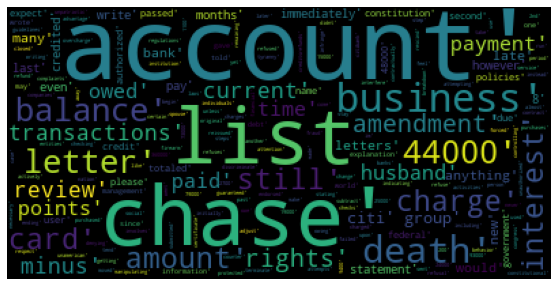

In [122]:
wordcloud = WordCloud().generate(str(text))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()